 # Trie (前缀树)


讲原理比较清楚的  
https://www.cnblogs.com/moonandstar08/p/5525344.html  
讲应用比较清楚的  
http://dongxicheng.org/structure/trietree/  
面试题  
https://blog.csdn.net/roney123/article/details/51500999  


# 字符串滑动窗口

基本思路是维护一个窗口，每次关注窗口中的字符串，在每次判断中，左窗口和右窗口选择其一向前移动。同样是维护一个HashSet, 正常情况下移动右窗口，如果没有出现重复则继续移动右窗口，如果发现重复字符，则说明当前窗口中的串已经不满足要求，继续移动有窗口不可能得到更好的结果，此时移动左窗口，直到不再有重复字符为止，中间跳过的这些串中不会有更好的结果，因为他们不是重复就是更短。因为左窗口和右窗口都只向前，所以两个窗口都对每个元素访问不超过一遍，因此时间复杂度为O(2*n)=O(n),是线性算法。空间复杂度为HashSet的size,也是O(n). 

**[例子](https://zhuanlan.zhihu.com/p/37440408)**

1. 举个例子：[1, 7, 5, 6, 7, 8]在这个数组中找到相邻的任意个数使和为13，求其中符合题意最短的个数。通过肉眼发现目前符合题意的有[1,7,5]和[6,7]。
2. 使用暴力的循环，可以解决问题，但是时间复杂度变为了O(n2)
3. 这是我们就需要使用滑动窗口，我们设定一个窗口在数组上面从左往右滚动，初始情况下窗口的大小为 【0,0】 ，一个元素都没有;
4. 我们检查窗口中元素的和是否小于13，当前是0所以小于13，我们就需要将窗口变大，变为【0,1】，也就是把窗口的右边界往右推，让他吃进第0个元素1，现在1仍然小于13，继续推动右边界，【0,2】和8，【0,3】和为13，现在和等于13了，我们记下当前的长度。
5. 然后将左边界向右推动，因为我们要寻找最短的长度，只有将左边界向右推才能使长度更短，按照步骤执行，当窗口推到最右边，窗口长度又变为0时，本次推动结束滑动窗口的局限性在于只适用于求连续问题，但是好处是可以大幅度降低时间复杂度。
[code可以参考](https://zhuanlan.zhihu.com/p/37440408)

模板：
1. 初始化窗口的范围:
初始值是[0, -1]代表当前窗口没有元素。
left, right = 0, -1  # [left...right]

2. 终止条件
在最终时刻左边界推到末端，右边界也推到末端。但是右边界会比左边界先推到末端，所以判断中只需要判断左边界即可。也就是左边界必须是在字符串范围内的
while left < len(s):

3. 移动条件
结合提议


方法小结

可以说滑动窗口这种思想，关键点在于：
1、map中存储值的意义
2、窗口什么时候扩展和收缩，对应于left和right值什么时候发生变化。
在解题的时候，首先尝试扩展窗口right，看看什么时候包含了一个结果，记录结果。然后缩小左边界left，直到窗口不在包含一个可能解！接着就可以继续扩展窗口了，以此类推。
https://blog.csdn.net/yy254117440/article/details/53025142 


https://blog.csdn.net/danjuanzi2684/article/details/83344517

https://www.cnblogs.com/jiangchen/p/5975730.html


https://blog.csdn.net/fangjian1204/article/details/38582181




In [3]:
##leetcode-003. 无重复字符的最长子串
# 给定一个字符串，找出不含有重复字符的最长子串的长度。
# 示例：
# 给定 "pwwkew" ，最长子串是 "wke" ，长度是3。请注意答案必须是一个子串，"pwke" 是 子序列 而不是子串。


class Solution:

    def lengthOfLongestSubstring(self, s):
        """
        1. 滑动窗口：左闭右闭。初始值-[0, -1]。
        2. 辅助变量：
            （1）符合条件的滑动窗口最长长度，初始值0。
        3. 终止条件：左边界推到末端，右边界也推到末端。但是右边界会比左边界先推到末端，所以判断中只需要判断左边界即可。
        4. 移动条件：窗口右边的值是否在窗口中，是左边界右移动，不是右边界右移动。
        5. 改变结果：当前的滑动窗口是最大长度。
        6. 返回值：窗口最大长度
        """
        left, right = 0, -1  # [left...right]

        max_len = 0

        # 终止条件
        while left < len(s):

            if right + 1 < len(s) and s[right + 1] not in s[left:right + 1]:
                right += 1
            else:
                left += 1

            max_len = max(max_len, right - left + 1)

        return max_len

    def lengthOfLongestSubstring02(self, s):
        """
        1. 优化(一): 用set代替字符串的查询
        """
        left, right = 0, -1  # [left...right]

        max_len = 0

        # 优化一
        window_ele = set()

        while left < len(s):

            if right + 1 < len(s) and s[right + 1] not in window_ele:
                window_ele.add(s[right + 1])
                right += 1
            else:
                window_ele.remove(s[left])
                left += 1

            max_len = max(max_len, right - left + 1)

        return max_len

    def lengthOfLongestSubstring03(self, s):
        """
        1. 优化：直接找到重复的位置
        """
        left, right = 0, -1  # [left...right]

        max_len = 0

        while left < len(s):
            if right + 1 >= len(s):
                break

            search = s.find(s[right + 1], left, right + 1)

            if search == -1:
                right += 1
            else:
                left = search + 1

            max_len = max(max_len, right - left + 1)

        return max_len

In [22]:
#leetcode-438.找到字符串中所有字母异位词
from collections import Counter
def find_an(source,target):
    left, right = 0, -1
    target_list=[i for i in target]
    target_counter = Counter(target_list)
    s_l=len(source)
    found_index=[]
    target_len=len(target_list)
    cur_dict={}
    while right+1<s_l:

        if   right-left+1==target_len: #区间只有先等于目标长度 才能接着谈是否一致
            
            right+=1
            if source[right] in target_list:
                cur_dict[source[right]]=cur_dict.get(source[right], 0)+1
            if source[left] in target_list:
                cur_dict[source[left]]=cur_dict.get(source[left], 0)-1    
            left+=1
            
        elif right-left+1<target_len:#区间不等于目标长度 发生在刚开始的几个 
            right+=1
            if source[right] in target_list:
                cur_dict[source[right]]=cur_dict.get(source[right], 0)+1
        
        if cur_dict==target_counter:  #不管怎么挪，挪完之后都去判断下
                found_index.append(left)
            
    return found_index
        
s='abcdabc'
p='abc'
print(find_an(s,p))

[0, 4]


In [29]:

def min_window(source,target):
    from collections import Counter
    left, right =0, -1
    target_list=[i for i in target]
    target_counter = Counter(target_list)
    s_l=len(source)
    found_index=[]
    target_len=len(target_list)
    cur_dict={}
    min_len=s_l+2
    def is_match(cur_dict,target_counter):
        for (k,v) in target_counter.items():
            if cur_dict.get(k,0)<v:
                return False
        return True
    flag=True
    while right+1<s_l: #这个地方很奇怪，right+1 因为是属于right 从-1开始，并且统计结果是包含right+1的
        
        right+=1
        r_s=s[right]
        if r_s in target_list : 
            cur_dict[r_s]=cur_dict.get(r_s,0)+1

        while is_match(cur_dict,target_counter): #如果匹配就不断缩left，直到不能不匹配，此时left 最紧，接着调整right
                if right-left+1<min_len:
                    min_len=right-left+1
                    found_index=[left,right]

                r_s=s[left] #调整left
                print('left {}'.format(left))
                if r_s in target_list :
                    cur_dict[r_s]=cur_dict.get(r_s,0)-1
                left+=1 
        print(cur_dict)
    return min_len,found_index
                    

            
            
s='1abc'
p='abc'
print(min_window(s,p))        
    

{}
{'a': 1}
{'a': 1, 'b': 1}
[0, 3]
left 0
[1, 3]
left 1
{'a': 0, 'b': 1, 'c': 1}
(3, [1, 3])


# 最短摘要算法

扫描过程始终保持一个[pBegin,pEnd]的range,初始化确保[pBegin,pEnd]的range里包含所有关键字 。然后每次迭代，尝试调整pBegin和pEnd： 

1.pBegin递增，直到range无法包含所有关键字 

2.pEnd递增，直到range重新包含所有关键字 

计算新的range，与旧的range相比，看是否缩短了，如果是，则更新 不考虑关键字的先后顺序 。这里给出最短摘要算法的几个应用，首先是leetcode上面的两题：

原文：https://blog.csdn.net/fangjian1204/article/details/38582181 


In [10]:
import operator
operator.eq('ba','ab')

False

In [54]:
# 080-Remove Duplicates from Sorted Array II
# Given a sorted array nums, remove the duplicates in-place such that duplicates appeared at most
# twice and return the new length.
def twice(array):
    i=0
    while i< len(array)-1:
        print(array)
        if array[i]==array[i+1]:
            value=array[i]
            i+=1
            j=i
            while j+1< len(array):
                if array[j+1]==value:
                    array.pop(j+1)
                else:
                    break
        else:
            i+=1
array=[1,1,1,1,2,2,2,3]
twice(array)  
print(array)

[1, 1, 1, 1, 2, 2, 2, 3]
[1, 1, 2, 2, 2, 3]
[1, 1, 2, 2, 2, 3]
[1, 1, 2, 2, 3]
[1, 1, 2, 2, 3]


In [65]:
# 340-Longest Substring with At Most K Distinct Characters
# Given a string, find the length of the longest substring T
# that contains at most k distinct characters.


def longgest_sub(source,k):
    from collections import Counter
    left, right =0,0
    def is_match(cur_set):
        return True if len(cur_set)<=k else False
    cur_set=set()
    longgest=0
    list_=[]
    while right<len(source):
        cur_set.add(source[right])
        if right>=k-1:
            if is_match(cur_set):
                cur_long=right-left+1
                if cur_long>longgest:
                    longgest=cur_long
                    print(right,left)
                right+=1
            else:
                right+=1
                cur_set.remove(source[left])
                left+=1
                
        else:
            right+=1
        
    
    return longgest
                    

            
            
s='ee'
p=2
print(longgest_sub(s,p))        
    

['e']
['e', 'e']
1 0
2


## 239-Sliding Window Maximum

1. 常规思路  
常规思路：遍历数组，每次计算最大值，或者遍历K次，将题目化为两个窗口的方法，时间复杂度为O(N*K), 显然不满足需求。
2. 最大堆  
其实做过“寻找n个无穷数中寻找最大的K个数”这题的话，应该比较容易想到，用堆来处理这种“求连续输入的数据中的最值”的题目。思路还是比较像的。
具体思路：
构建一个大小为K的最大堆，每次从堆中取出窗口的最大值，随着窗口往右滑动，需要将堆中不属于窗口的堆顶元素删除。
这里的堆，我们直接使用STL中的优先队列priority_queue（可以理解为另一种形式的堆）
代码如下，复杂度为O(N*logN)  

3. 双端队列  
使用双端队列，队列元素降序排序，队首元素为所求最大值。滑动窗口右移，若出现的元素比队首（最大元素）大，此时清空队列，并将最大值插入队列。若比当前值小，则插入尾部。每次窗口右移的时候需要判断当前的最大值是否在有效范围，若不在，则需要将其从队列中删除。

4. 某位大神的O(n)解法  
大致思路就是对窗口值对数组进行分段，然后左右分别计算区域内最大值，最后归并。感觉非常smart啊。这个方法值得好好归纳一下，好像之前某些题也有类似的做法。


In [ ]:
#239-Sliding Window Maximum
#最大堆

def solution2(array,k):
    

In [67]:
#Solution 2: Using dqueue O(n)
#1. 如果队列为空，则当前数字入队列 
#2. 如果当前数字大于队列尾，则删除队列尾，直到当前数字小于等于队列尾，或者队列空，然后当前数字入队列 
#3. 如果当前数字小于队列尾，则当前数字入队列 
#4. 如果队列头超出滑动窗口范围，则删除队列头 

def maxSlidingWindow( nums, k):
    """
    :type nums: List[int]
    :type k: int
    :rtype: List[int]
    """
    res = []
    queue = []
    n = len(nums)

    for i in range(n):
        while queue and queue[-1] < nums[i] : #这里并没有用《=，所以对于等于队尾的也是可以保留的，这样避免后面考虑窗口过期问题时候，误伤
            queue.pop()
        queue.append(nums[i])

        j = i - k
        if i >= k and queue[0] == nums[j] : #这个主要把队头已经不再窗口的给删了，从i大于滑动窗口，每次i就可以考虑了
            queue.pop(0)
        if i >= k-1: #例如k=2，i已经从0开始所以i=1就可以考虑结果了。
            res.append(queue[0])
    return res
nums = [1,3,-1,2,1,3,3,3,3,3,3,1,3,-3,5,3,6,7]
k = 3
print(maxSlidingWindow( nums, k))

[3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 6, 7]


In [ ]:
#244-Shortest Word Distance II

class WordDistance(object):

    def __init__(self, words):
        """
        :type words: List[str]
        """
        self.dic = {}
        self.length = len(words)
        for i, s in enumerate(words):
            if s in self.dic:
                self.dic[s].append(i)
            else:
                self.dic[s] = [i]


    def shortest(self, word1, word2):
        """
        :type word1: str
        :type word2: str
        :rtype: int
        """
        pos1 = self.dic[word1]
        pos2 = self.dic[word2]
        n1 = len(pos1)
        n2 = len(pos2)
        i, j = 0, 0
        res = self.length + 1
        while i < n1 and j < n2: #and  这个条件 因为后面比较的时候 已经把如果j=n2-1 i需要考虑j=n2-1左右两边的情况的，至少左右两边是step=1，所以没必要考step2的情况没意义了。
            res = min(res, abs(pos2[j] - pos1[i]))
            if pos1[i] < pos2[j]: #谁小 就谁主动变大，靠近大的，因为构造字典是按list的index从小到大的
                i += 1
            else:
                j += 1
        return res

# 3,4sum的问题也是考虑双指针
先sort（顺序变成从小到大），一个从i+1开始，一个从尾巴开始，这样 如果这几个sum结果<target，那说明头指针小了，头指针往后；大了说明尾指针太大了，往前可以得到小一点的数据

In [68]:
# 274-H-Index
# Given an array of citations (each citation is a non-negative integer) of a researcher,
# write a function to compute the researcher's h-index.

class Solution(object):
    def hIndex(self, citations):
        """
        :type citations: List[int]
        :rtype: int
        """
        citations.sort()
        n = len(citations)
        #这个已经是排过序的，也就是说题目要是如果认为是h，那么要有篇文章都是h以上。
        #那么排过序的最小值如果都满足后面的就都满足了。
        #于是假设n，也就是最小的值也要是n，
        #不行i已经到1了，那么就假设n-1，那么此时的最小值也就是i=1，看看满不满足n-1
        #于是h 和就逆着了。
        for i in range(n):
            h = n - i
            if citations[i] >= h:
                return h
        return 0

    

In [69]:
# 346-Moving Average from Data Stream
# Given a stream of integers and a window size, calculate the moving average of all integers in the sliding window.
#用一个队列先进先走维护窗口，然后走了的顺便把total给剪了，
class MovingAverage(object):

    def __init__(self, size):
        """
        Initialize your data structure here.
        :type size: int
        """
        self.size = size
        self.total = 0
        self.q = []

    def next(self, val):
        """
        :type val: int
        :rtype: float
        """
        if len(self.q) < self.size :
            self.q.append(val)
            self.total = float(sum(self.q))
            return self.total / len(self.q)
        else:
            head = self.q.pop(0) 
            self.q.append(val)
            self.total = self.total - head + val
            return self.total / self.size

In [73]:
# Input: S = "5F3Z-2e-9-w", K = 4

# Output: "5F3Z-2E9W"

# Explanation: The string S has been split into two parts, each part has 4 characters.
# Note that the two extra dashes are not needed and can be removed.

def upp(keys,k):
    keys=keys.replace('-','').upper()[::-1]
    kg=[]
    for i in range(0,len(keys),k):
        kg.append(keys[i:i+k])
    kg='-'.join(kg)
    kg=kg[::-1]
    print(kg)
keys= "5F3Z-2e-9-w"
k = 4
upp(keys,k)

5F3Z-2E9W


In [112]:
# 388-Longest Absolute File Path
# Suppose we abstract our file system by a string in the following manner:
# The string "dir\n\tsubdir1\n\tsubdir2\n\t\tfile.ext" represents:
# 先用\n 切割， 得到几个路径部分
# 有几个\t那么堆里就应该剩下几个路径部分,先处理完堆里的情况
#然后加入新的路径，然后记录结果
def abs_path(path):
    dirs=path.split('\n')
    if len(dirs)==0:
        return 0
    stack=[]
    result=[]
    def count_t(t_p):
        dir_name = t_p.strip("\t")
        t_c = len(t_p) - len(dir_name)
        return t_c
        
    for i in range(0,len(dirs)):
        cur_t=count_t(dirs[i])
        cur_p=dirs[i].replace('\t','')
        while len(stack)!=cur_t:
            stack.pop()
        stack.append(cur_p)
        result.append('/'.join(stack))
    return result
path="dir\n\tsubdir1\n\tsubdir2\n\t\tfile.ext\n\t\tfi3le.ext\n\tsubdir3"
print(abs_path(path))
        
        
        

['dir', 'dir/subdir1', 'dir/subdir2', 'dir/subdir2/file.ext', 'dir/subdir2/fi3le.ext', 'dir/subdir3']


In [96]:
ls.remove(0)

ValueError: list.remove(x): x not in list

In [81]:
ls

[1, 2]

In [82]:
'\t'*2


'\t\t'

# LeetCode Monotone Stack Summary 单调栈小结

单调递增栈可以找到左起第一个比当前数字小的元素。比如数组 [2 1 4 6 5]，刚开始2入栈，数字1入栈的时候，发现栈顶元素2比较大，将2移出栈，此时1入栈。那么2和1都没左起比自身小的数字。然后数字4入栈的时候，栈顶元素1小于4，于是1就是4左起第一个小的数字。此时栈里有1和4，然后数字6入栈的时候，栈顶元素4小于6，于是4就是6左起第一个小的数字。此时栈里有1，4，6，然后数字5入栈的时候，栈顶元素6大于5，将6移除，此时新的栈顶元素4小于5，那么4就是5左起的第一个小的数字，最终栈内数字为1，4，5。

单调栈的一大优势就是线性的时间复杂度，所有的元素只会进栈一次，而且一旦出栈后就不会再进来了。  
**如果是维护单调递增的栈，那么需要再最后搞的dummy0 触发下，表示遇到递减了要处理了，否则最后一个没法处理**


总结下套路：
1.遇到stack为空，或者新的数据符合单调站
2.不符合：考虑头尾的0怎么处理，头部则是是否要判定为空就不管了，尾巴要么加dummy。
           在pop前面都需要加上while stack!=[]，如果都处理完了，就把新数据进入单调

 [Trapping Rain Water 收集雨水](http://www.cnblogs.com/grandyang/p/8887985.html)    
 [code](https://blog.csdn.net/zhc_24/article/details/83032653)  
Given n non-negative integers representing an elevation map where the width of each bar is 1, compute how much water it is able to trap after raining.

For example, 
Given [0,1,0,2,1,0,1,3,2,1,2,1], return 6.

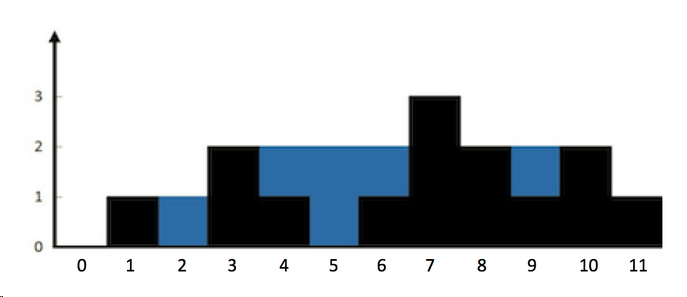

In [30]:
def water(array):
    stack=[]
    result=0
    for i in  range(len(array)):
        #print(i)
        if  stack==[] or array[stack[-1]]>=array[i]:
            stack.append(i)
        else:
            while stack!=[] and array[stack[-1]]<array[i]:
                min_level=array[stack.pop()] #最小的做底边
                if stack!=[]:
                    left_i=stack[-1] #次小的可能做边，所以只是取值，不弹出
                    left=array[left_i]
                    right=array[i]
                    height=min(right,left)-min_level
                    width=i-left_i-1
                    result+=height*width
                    print(i,result)
            stack.append(i)
    print(result)
    
    
array= [0,1,0,2,1,0,1,3,2,1,2,1] #6

water(array)

3 1
6 2
7 2
7 5
10 6
6


# LeetCode  [Largest Rectangle in Histogram](http://www.cnblogs.com/lichen782/p/leetcode_Largest_Rectangle_in_Histogram.html)


Given n non-negative integers representing the histogram's bar height where the width of each bar is 1, find the area of largest rectangle in the histogram.

Above is a histogram where width of each bar is 1, given height = [2,1,5,6,2,3].

**这题是靠递减的就触发，所以要在最后搞dummy0**

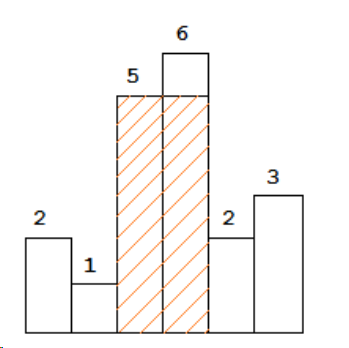




In [34]:
# array=[2,1,5,6,2,3] #reuslt is 10
def rect(array):
    array.append(0) #dummy 0
    stack=[]
    result=0
    for i in  range(len(array)):
        if  stack==[] or array[stack[-1]]<=array[i]:
            stack.append(i)
        else:
            
            highest_i=stack.pop()
            highest=array[highest_i] #最高的柱子
            result=max(result,highest*1)
            print(i,highest*1)
            while stack!=[] and array[stack[-1]]>array[i]:
                left_i=stack.pop()
                width=highest_i-left_i+1
                height=array[left_i]
                result=max(height*width,result)
                print(i,height*width)
            stack.append(i)
    print(result)
    
    
array= [2,1,5,6,2,10,10] #reuslt is 10

rect(array)

1 2
4 6
4 10
7 10
7 20
7 6
7 6
20


In [44]:
#[Leetcode] 739. Daily Temperatures 

def temperatures(temp):
    stack=[]
    result=[]
    for t in range(len(temp)-1,-1,-1):
        if stack==[]:
            stack.append(t)
            result.append(0)
        else:
            
            while stack==[] and temp[stack[-1]]<=temp[t]:
                stack.pop()
            if stack==[]:
                result.append(0)
            else:
                result.append(stack[-1]-t)
            stack.append(t)
    result.reverse()
    print(result)
temp=[73, 74, 75, 71, 69, 72, 76, 73]#, your output should be [1, 1, 4, 2, 1, 1, 0, 0]
temperatures(temp)

[1, 1, 1, 1, 1, 1, 1, 0]
